In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

Size of training and test data: (20000,) (20000,)


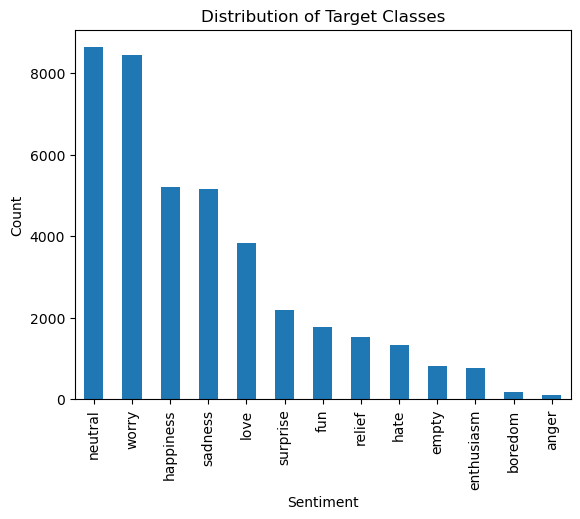

In [2]:
'''
Go to Kaggle.com. Find a text classification data set that interests you. Divide into train/test.
Create a graph showing the distribution of the target classes. Describe the data set and what the
model should be able to predict.
'''
# Load the df & remove redundant column
df = pd.read_csv('tweet_emotions.csv')
df = df.drop('tweet_id', axis=1)

# Test/Train Split
train_data, test_data, train_labels, test_labels = train_test_split(df['content'], df['sentiment'], test_size=0.5, random_state=1337)

print('Size of training and test data:', train_labels.shape, test_labels.shape)

# Graph the distribution of the target classes (Sentiment)
fig, ax = plt.subplots()
df['sentiment'].value_counts().plot(kind='bar', ax=ax)

ax.set_title('Distribution of Target Classes')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

plt.show()

In [3]:
'''
Create a sequential model and evaluate on the test data
'''
# Vectorize/Encode the data
vectorizer = TfidfVectorizer(stop_words='english')
label_encoder = LabelEncoder()

x_train = vectorizer.fit_transform(train_data).toarray()
x_test = vectorizer.transform(test_data).toarray()

y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

# Adjust the input shape to match the length of the vectorized features
input_shape = x_train.shape[1]

# Get the number of unique classes
num_classes = len(label_encoder.classes_)

# Build the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax')) 

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy']) 

# Create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
20/20 [==============================] - 3s 145ms/step - loss: 2.5426 - sparse_categorical_accuracy: 0.2055 - val_loss: 2.5191 - val_sparse_categorical_accuracy: 0.2116
Epoch 2/20
20/20 [==============================] - 1s 29ms/step - loss: 2.4952 - sparse_categorical_accuracy: 0.2145 - val_loss: 2.4676 - val_sparse_categorical_accuracy: 0.2156
Epoch 3/20
20/20 [==============================] - 1s 30ms/step - loss: 2.4356 - sparse_categorical_accuracy: 0.2205 - val_loss: 2.4033 - val_sparse_categorical_accuracy: 0.2164
Epoch 4/20
20/20 [==============================] - 1s 29ms/step - loss: 2.3661 - sparse_categorical_accuracy: 0.2256 - val_loss: 2.3334 - val_sparse_categorical_accuracy: 0.2227
Epoch 5/20
20/20 [==============================] - 1s 31ms/step - loss: 2.2941 - sparse_categorical_accuracy: 0.2466 - val_loss: 2.2670 - val_sparse_categorical_accuracy: 0.2299
Epoch 6/20
20/20 [==============================] - 1s 31ms/step - loss: 2.2301 - sparse_categorical_acc

Classification Report
625/625 [==============================] - 1s 929us/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        58
           1       1.00      0.00      0.00        84
           2       1.00      0.00      0.00       423
           3       1.00      0.00      0.00       365
           4       1.00      0.00      0.00       873
           5       0.34      0.33      0.33      2605
           6       1.00      0.00      0.00       657
           7       0.59      0.09      0.16      1895
           8       0.27      0.51      0.35      4395
           9       1.00      0.00      0.00       794
          10       1.00      0.00      0.00      2555
          11       1.00      0.00      0.00      1061
          12       0.31      0.65      0.42      4235

    accuracy                           0.30     20000
   macro avg       0.81      0.12      0.10     20000
weighted avg       0.57      0.30      0.23     20000



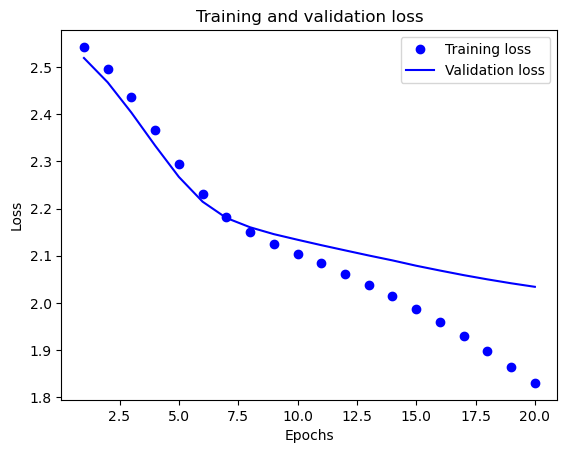

In [4]:
# Classifcation report (since it's multi-classification it will have more values)
print("Classification Report")
prob = model.predict(x_test)
pred = np.argmax(prob, axis=1)
print(classification_report(y_test, pred, zero_division=1)) #Set non-predicted to 1.00 instead of 0.00

# Tf Evaluation 
print("TF Evaluation")
losses_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print(losses_and_metrics)

# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [5]:
'''
Try a different architecture like RNN, CNN, etc and evaluate on the test data
'''

'\nTry a different architecture like RNN, CNN, etc and evaluate on the test data\n'

In [ ]:
#RNN
# Tokenize and pad the text sequences
max_words = 10000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data)

x_train = tokenizer.texts_to_sequences(train_data)
x_test = tokenizer.texts_to_sequences(test_data)

x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

# Get the number of unique classes
num_classes = len(label_encoder.classes_)

# Build the model
model = models.Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_sequence_length))
model.add(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/10
79/79 [==============================] - 19s 219ms/step - loss: 2.1870 - sparse_categorical_accuracy: 0.2279 - val_loss: 2.1310 - val_sparse_categorical_accuracy: 0.2467
Epoch 2/10
79/79 [==============================] - 17s 220ms/step - loss: 2.0317 - sparse_categorical_accuracy: 0.2970 - val_loss: 2.0311 - val_sparse_categorical_accuracy: 0.3068
Epoch 3/10
79/79 [==============================] - 17s 222ms/step - loss: 1.7905 - sparse_categorical_accuracy: 0.4028 - val_loss: 2.0994 - val_sparse_categorical_accuracy: 0.3026
Epoch 4/10
57/79 [====================>.........] - ETA: 4s - loss: 1.5589 - sparse_categorical_accuracy: 0.4927

In [ ]:
# Classifcation report (since it's multi-classification it will have more values)
print("Classification Report")
prob = model.predict(x_test)
pred = np.argmax(prob, axis=1)
print(classification_report(y_test, pred, zero_division=1)) #Set non-predicted to 1.00 instead of 0.00

# Tf Evaluation 
print("TF Evaluation")
losses_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print(losses_and_metrics)

# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# CNN
# Tokenize and pad
max_words = 10000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data)

x_train = tokenizer.texts_to_sequences(train_data)
x_test = tokenizer.texts_to_sequences(test_data)

x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

# Get the number of unique classes
num_classes = len(label_encoder.classes_)

# Build the model
model = models.Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_sequence_length))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

In [ ]:
# Classifcation report (since it's multi-classification it will have more values)
print("Classification Report")
prob = model.predict(x_test)
pred = np.argmax(prob, axis=1)
print(classification_report(y_test, pred, zero_division=1)) #Set non-predicted to 1.00 instead of 0.00

# Tf Evaluation 
print("TF Evaluation")
losses_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print(losses_and_metrics)

# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
'''
Try different embedding approaches and evaluate on the test data (Evaluation at the end)
'''
# Tokenize the text data
max_words = 10000
max_sequence_length = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data)

x_train_seq = tokenizer.texts_to_sequences(train_data)
x_test_seq = tokenizer.texts_to_sequences(test_data)

# Pad the sequences
x_train = pad_sequences(x_train_seq, maxlen=max_sequence_length)
x_test = pad_sequences(x_test_seq, maxlen=max_sequence_length)

y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)

# Get the number of unique classes
num_classes = len(label_encoder.classes_)

# Build the model
model = models.Sequential()
model.add(layers.Embedding(max_words, 100, input_length=max_sequence_length))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
# Classifcation report (since it's multi-classification it will have more values)
print("Classification Report")
prob = model.predict(x_test)
pred = np.argmax(prob, axis=1)
print(classification_report(y_test, pred, zero_division=1)) #Set non-predicted to 1.00 instead of 0.00

# Tf Evaluation 
print("TF Evaluation")
losses_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print(losses_and_metrics)

# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
'''
Write up your analysis of the performance of various approaches
'''

'''
For my program I ran multi-classification rather than a binary classification. 
This meant some changes in how the functionality was implemented but the biggest change was a lower base accuracy.
This was probably due to more choices and more complexity leading to more possibilities for mistakes.

For the sequential model the data was pretty inaccurate, the highest sparse categorical accuracy at 20 was 0.3959.
It did have a pretty steady climb in accuracy and was pretty fast to compute each epoch though.

For RNN the data started out relatively similar in accuracy but went much higher with each epoch.
The highest sparse categorical accuracy was 0.8140 which was a significant improvement.
The time to compute each epoch was significantly higher than the sequential model.

CNN was overall the best, it went up quickly in accuracy for each epoch and reached the highest sparse categorical accuracy.
It ended up at 0.9718 for the last epoch, and computed fairly quickly.

For the TF evaluation the sequential model was actually the highest in accuracy but they all ranked fairly similarly.

For training & loss validation RNN & CNN performed similarly, with training loss going up and validation loss going down.
For sequential both the training and validation loss went down a bit.

When adding embedding to the sequential model it resulted in a lower amount of training loss with more epochs.
It also resulted in slightly higher sparse categorical accuracy. Overall it was an improvement.
'''